In [82]:
import pandas as pd
import glob, os    
import matplotlib.pyplot as plt


In [18]:
# import csv with data and concat into one dataframe

path = r'C:\Users\home\PycharmProjects\Yad2\csvs'                     
all_files = glob.glob(os.path.join(path, "*.csv"))    

df_from_each_file = (pd.read_csv(f,parse_dates=True) for f in all_files)
concatenated_df   = pd.concat(df_from_each_file, ignore_index=True)


In [19]:
# drop na rows 

data = concatenated_df.dropna().reset_index( drop=True, inplace=False)

# organize the columns

cat_cols = ['דגם', 'אזור']
date_cols = ['שנה','תאריך']
int_cols = [ 'נפח', 'מחיר', 'יד','שנה']

data[date_cols] = data[date_cols].astype('datetime64[ns]')
data[cat_cols] = data[cat_cols].astype('category')
data[int_cols] = data[int_cols].replace({'\₪': '', ',': ''}, regex=True).astype('int64')

# from one column with model and company to 2 diffrent columns

data['חברה'] = data['דגם'].str.split(' ').str[0]
data['דגם'] = data['דגם'].str.split(' ').str[2]

In [20]:
data.head()

,דגם,נפח,שנה,מחיר,יד,תאריך,אזור,חברה
0,סיריון,1298,2008,16500,4,2018-05-08,פתח תקווה והסביבה,דייהטסו
1,פולו,1390,2007,17000,3,2018-05-08,תל אביב,פולקסווגן
2,אבאו,1399,2009,9000,3,2018-05-08,רמת השרון - הרצליה,שברולט
3,207,1598,2008,10000,2,2018-05-08,רעננה - כפר סבא,פיג'ו
4,פוקוס,1999,2007,15000,2,2018-05-08,ראשון לציון והסביבה,פורד


In [21]:
# rename columns to english

data.rename(columns={'חברה': 'company', 'אזור': 'area', 'תאריך': 'date', 'יד': 'hand', 'מחיר': 'price', 'שנה': 'year', 'נפח': 'motor_volume', 'דגם': 'model'}, inplace=True)

In [22]:
data.head()

,model,motor_volume,year,price,hand,date,area,company
0,סיריון,1298,2008,16500,4,2018-05-08,פתח תקווה והסביבה,דייהטסו
1,פולו,1390,2007,17000,3,2018-05-08,תל אביב,פולקסווגן
2,אבאו,1399,2009,9000,3,2018-05-08,רמת השרון - הרצליה,שברולט
3,207,1598,2008,10000,2,2018-05-08,רעננה - כפר סבא,פיג'ו
4,פוקוס,1999,2007,15000,2,2018-05-08,ראשון לציון והסביבה,פורד


In [23]:
# order the columns in the dataframe

order_cols = [ 'motor_volume','date', 'area','price','hand','year','model',
       'company']

data = data[order_cols]

In [24]:
data.head()

,motor_volume,date,area,price,hand,year,model,company
0,1298,2018-05-08,פתח תקווה והסביבה,16500,4,2008,סיריון,דייהטסו
1,1390,2018-05-08,תל אביב,17000,3,2007,פולו,פולקסווגן
2,1399,2018-05-08,רמת השרון - הרצליה,9000,3,2009,אבאו,שברולט
3,1598,2018-05-08,רעננה - כפר סבא,10000,2,2008,207,פיג'ו
4,1999,2018-05-08,ראשון לציון והסביבה,15000,2,2007,פוקוס,פורד


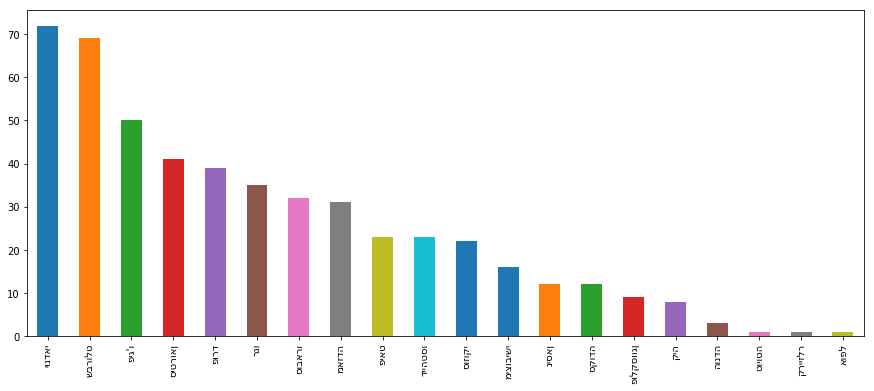

In [25]:
# number of cars from each company

plt.figure(figsize=(15,6))

colors = ['red', 'blue', 'green',  'yellow', 'grey']

data['company'].value_counts().plot(kind='bar')

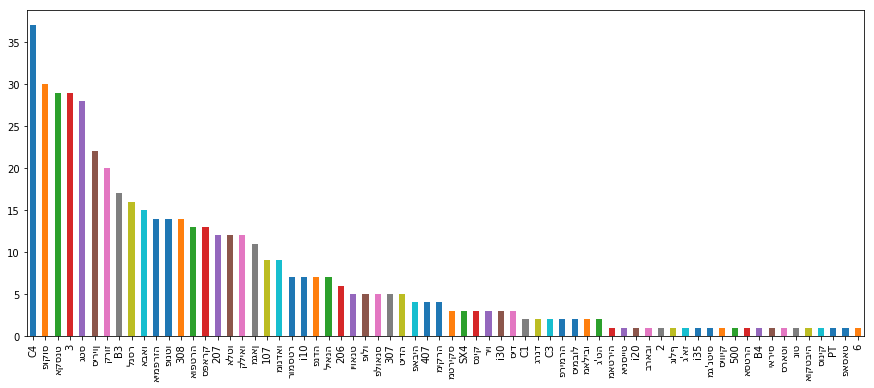

In [26]:
# number of cars from each model

plt.figure(figsize=(15,6))

colors = ['red', 'blue', 'green',  'yellow', 'grey']

data['model'].value_counts().plot(kind='bar')

In [27]:
data.head()

,motor_volume,date,area,price,hand,year,model,company
0,1298,2018-05-08,פתח תקווה והסביבה,16500,4,2008,סיריון,דייהטסו
1,1390,2018-05-08,תל אביב,17000,3,2007,פולו,פולקסווגן
2,1399,2018-05-08,רמת השרון - הרצליה,9000,3,2009,אבאו,שברולט
3,1598,2018-05-08,רעננה - כפר סבא,10000,2,2008,207,פיג'ו
4,1999,2018-05-08,ראשון לציון והסביבה,15000,2,2007,פוקוס,פורד


In [28]:
# add some prices data 

prices = pd.DataFrame()

# minimum price for car and model
prices['min']=data[['model', 'company','price']].groupby(['model', 'company'])['price'].min()

# maximum price for car and model
prices['max']=data[['model', 'company','price']].groupby(['model', 'company'])['price'].max()

# avg price for car and model
prices['mean']=data[['model', 'company','price']].groupby(['model', 'company'])['price'].mean().astype('int')

# avg price for car model hand and year

exact = pd.DataFrame()
exact['same_car_mean']=data[['model', 'company','price','hand','year']].groupby(['model', 'company','hand','year'])['price'].mean().astype('int')

In [29]:
# merge to one dataframe

cars = data.merge(prices,how= 'left',on =['company','model'] ).merge(exact,how= 'left',on =['model', 'company','hand','year'])

In [30]:
# order columns

order_cols = ['motor_volume', 'date', 'area', 'min', 'max', 'mean', 'same_car_mean', 'price', 'hand', 'year', 'model',
       'company']

cars = cars[order_cols]

In [31]:
cars

,motor_volume,date,area,min,max,mean,same_car_mean,price,hand,year,model,company
0,1298,2018-05-08,פתח תקווה והסביבה,10000,17000,14477,16500,16500,4,2008,סיריון,דייהטסו
1,1390,2018-05-08,תל אביב,11000,17000,14700,14166,17000,3,2007,פולו,פולקסווגן
2,1399,2018-05-08,רמת השרון - הרצליה,6500,11500,8759,10250,9000,3,2009,אבאו,שברולט
3,1598,2018-05-08,רעננה - כפר סבא,9000,16900,13541,10000,10000,2,2008,207,פיג'ו
4,1999,2018-05-08,ראשון לציון והסביבה,7000,16500,12316,12600,15000,2,2007,פוקוס,פורד
5,1386,2018-05-08,תל אביב,10900,17000,13675,14300,14300,4,2008,מיקרה,ניסאן
6,1598,2018-05-08,ראשון לציון והסביבה,13500,16000,15100,16000,16000,2,2011,טידה,ניסאן
7,1598,2018-05-08,מודיעין והסביבה,13500,16000,15100,15500,15500,3,2009,טידה,ניסאן
8,1498,2018-05-08,מודיעין והסביבה,8900,17000,12214,12600,14900,2,2007,אימפרזה,סובארו
9,1591,2018-05-08,רעננה - כפר סבא,15000,17000,16333,17000,17000,2,2008,i30,יונדאי


In [59]:
#if we want to find outliers for some of the  cars

company_list = ['פורד', 'פיאט', 'שברולט', 'סובארו', 'סיטרואן',
       'יונדאי', 'ניסאן', 'מאזדה' 'קיה',
       'רנו', "פיג'ו", 'טויוטה']

cars.model.unique()

models_list = ['פוקוס', 'בראבו', 'לנסר', 'פונטו', 'אבאו', 'B3', 'אופטרה', 'C4',
       'אקסנט', 'מיקרה', 'קרוז', 'גטס', 'אימפרזה', 'סוניק', 'פאביה',
        'סיריון', 'ריו', 'סיד', 'מגאן', 'i10', 'ספארק', '3',
       'פלואנס', 'קליאו',  '207', 'אלטו', 'סדרה', "ג'וק",
       'פיקנטו', '206', 'סניק', 'ליאנה', 'טידה', 'מטריקס']


#cars = cars[(cars['company'].isin(company_list)) & (cars['hand'] < 3 )]

#cars = cars[(cars['company'].isin(company_list)) & (cars['model'].isin(models_list) )]

# outliear detection



In [83]:
df = cars[['same_car_mean','price']]



In [84]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(df)
y_kmeans = kmeans.predict(df)


Text(0,0.5,'price')

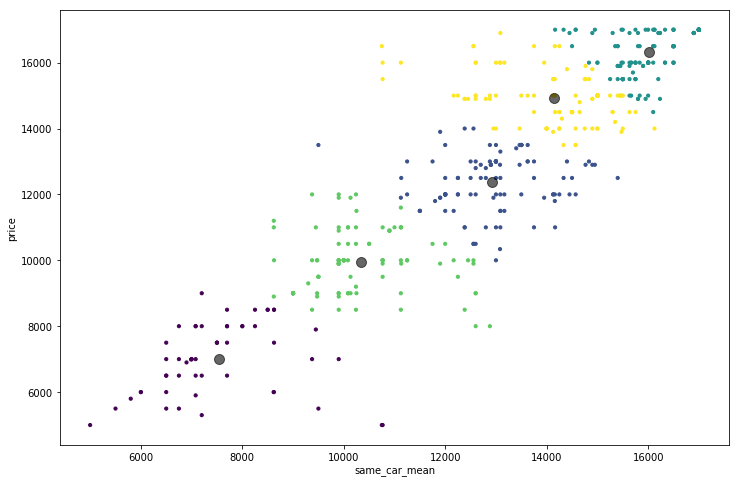

In [85]:
plt.figure(figsize=(12,8))
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=y_kmeans, s=10, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.6)
plt.xlabel('same_car_mean')
plt.ylabel('price')


In [87]:
# lets check the 2 bootom middle cars

cars[(cars['price']<7000) & (cars['same_car_mean']>10000)]



,motor_volume,date,area,min,max,mean,same_car_mean,price,hand,year,model,company
216,1598,2018-05-08,ראש העין והסביבה,5000,16500,9707,10750,5000,2,2009,אופטרה,שברולט
325,1598,2018-05-08,תל אביב,5000,17000,12267,10766,5000,2,2009,C4,סיטרואן


In [88]:
# or the 4 outliers in the top middle in yellow 

cars[(cars['price']>14000) & (cars['same_car_mean']<12000)]

,motor_volume,date,area,min,max,mean,same_car_mean,price,hand,year,model,company
102,1598,2018-05-08,תל אביב,5000,17000,12267,10766,15500,2,2009,C4,סיטרואן
173,1599,2018-05-08,חולון - בת ים,8500,16900,13593,11125,16000,2,2007,אקסנט,יונדאי
306,1598,2018-05-08,צפון השרון,5000,17000,12267,10766,16000,2,2009,C4,סיטרואן
474,1598,2018-05-08,חולון - בת ים,5000,16500,9707,10750,16500,2,2009,אופטרה,שברולט


# SVM 

In [89]:
from sklearn import svm
clf = svm.OneClassSVM(nu=0.05, kernel="rbf", gamma=0.1)
clf.fit(df)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=0.1, kernel='rbf',
      max_iter=-1, nu=0.05, random_state=None, shrinking=True, tol=0.001,
      verbose=False)

In [90]:
pred = clf.predict(df)

# inliers are labeled 1, outliers are labeled -1
normal = df[pred == 1]
abnormal = df[pred == -1]

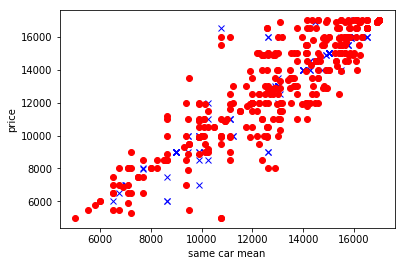

In [92]:
plt.figure()
plt.plot(normal.iloc[:,0],normal.iloc[:,1],'bx') ## blue X means normal 
plt.plot(abnormal.iloc[:,0],abnormal.iloc[:,1],'ro') ## red o abnormal
plt.ylabel('price')
plt.xlabel('same car mean')
plt.show()